- This project predicts a student’s total score based on three factors:
     weekly self-study hours, attendance percentage, and class participation.
   - The model uses previous student data to learn the relationship between these factors and the final score.
   - The output is a predicted score, not an exact real score, so sometimes it can be slightly higher than 100 because it is a mathematical prediction.
   - The goal of the project is to show how machine learning can be used to estimate student performance, not to replace real grading
- Dataset Description
This dataset contains student performance data where each row represents a student.
The dataset includes academic and behavioral factors such as weekly self-study hours, attendance percentage, and class participation, which influence the student’s final performance score.

- Objective of the Project
The objective of this project is to predict the total_score of a student using multiple independent variables such as weekly self-study hours, attendance percentage, and class participation by applying Multiple Linear Regression.

- Identify Features and Target
Independent Variables (X) =  weekly_self_study_hours , attendance_percentage , class_participation
Dependent Variable (y) = total_score


In [9]:
import pandas as pd

df = pd.read_csv("student_performance.csv")
df.head()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [2]:
df.shape
#df.info()
#df.describe()


(1000000, 6)

Data Exploration

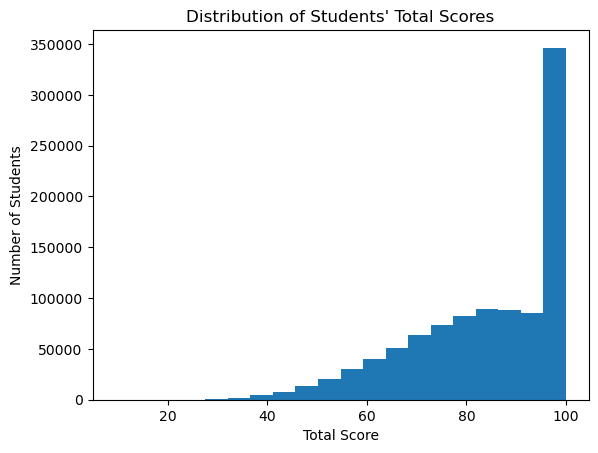

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['total_score'], bins=20)
plt.xlabel("Total Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Students' Total Scores")
plt.show()
# The histogram shows how students’ total scores are distributed. Most students score in the middle range, while
#fewer students achieve very low or very high scores, indicating a roughly normal distribution.

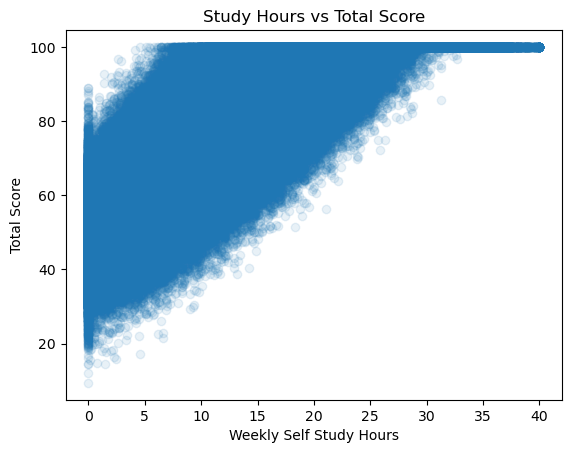

In [11]:
# Relationship Between Variables
# Study Hours vs Total Score
plt.scatter(df['weekly_self_study_hours'], df['total_score'], alpha=0.1)
plt.xlabel("Weekly Self Study Hours")
plt.ylabel("Total Score")
plt.title("Study Hours vs Total Score")
plt.show()
# The scatter plot shows a positive relationship between weekly self-study hours and total score.
#As study hours increase, student performance tends to improve.


What do we SEE?
Dots go upwards as we move to the right
Students with few study hours → lower scores
Students with more study hours → higher scores

Meaning (the idea)
When study hours increase, total score usually increases.

This is called a positive relationship
(positive = both go up together)

This scatter plot shows that students who spend more hours studying per week tend to achieve higher total scores. There is a clear positive relationship between study hours and student performance.

conclusion : if asked : “Which factor impacts performance more?”
answer : Study hours matter far more than attendance.

chart : Strong conclusion: Study hours strongly affect total score

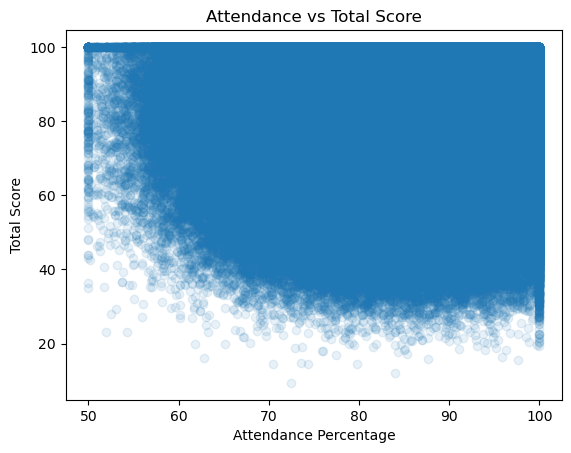

In [5]:
# Attendance vs Total Score
plt.scatter(df['attendance_percentage'], df['total_score'],  alpha=0.1)



plt.xlabel("Attendance Percentage")
plt.ylabel("Total Score")
plt.title("Attendance vs Total Score")
plt.show()
# Students with higher attendance percentages generally achieve higher total scores, indicating attendance has a positive impact on performance.



In [12]:
# Correlation Between Features

corr = df[['weekly_self_study_hours',
           'attendance_percentage',
           'class_participation',
           'total_score']].corr()

corr
# The correlation matrix shows that weekly self-study hours have the strongest positive correlation with total score,
#followed by attendance and class participation.

,weekly_self_study_hours,attendance_percentage,class_participation,total_score
weekly_self_study_hours,1.000000,-0.001008,0.001244,0.812241
attendance_percentage,-0.001008,1.000000,-0.000043,-0.001014
class_participation,0.001244,-0.000043,1.000000,0.000684
total_score,0.812241,-0.001014,0.000684,1.000000


Section 3: Data Preprocessing

Data preprocessing means:

Cleaning and preparing data before training the model

Your project outline requires:

3.1 Handle missing values

3.2 Remove duplicates

3.3 Handle outliers

In [7]:
df.isnull().sum() 
# check null - If you see 0 → no missing values If you see numbers → those columns have missing data
#df.duplicated().sum() # check duplicate                                                                                                                                                                     
# df = df.drop_duplicates() - remove duplicate 

student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64

In [13]:
# Handle Outliers (Using IQR Method
numeric_cols = [
    'weekly_self_study_hours',
    'attendance_percentage',
    'class_participation',
    'total_score'
]

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

df = df[~(
    (df[numeric_cols] < (Q1 - 1.5 * IQR)) |
    (df[numeric_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]

# What this does (simple words):

#Finds extreme values
#Removes rows with unrealistic values
#Keeps data realistic and clean

# Outliers were detected and removed using the Interquartile Range (IQR) method. This helps reduce the
#impact of extreme values and improves the reliability of the regression model.

SECTION 4: Model Training

Model training means:

Teaching the computer to learn the relationship between inputs and output.

We will do exactly two things:

4.1 Split the data

4.2 Train the model

In [14]:
#Prepare Features (X) and Target (y)
#X (inputs) → study hours, attendance, participation
#y (output) → total score
X = df[['weekly_self_study_hours',
        'attendance_percentage',
        'class_participation']]

y = df['total_score']
# Independent variables were selected based on factors that influence student performance, while total_score was used as the dependent variable.
# X.head()
y.head()


0     97.9
1     83.9
2    100.0
3    100.0
4     92.0
Name: total_score, dtype: float64

In [15]:
# Split the Dataset (Train & Test)
#We split the data so the model can be tested fairly.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
# Meaning:
#80% → training
#20% → testing
#random_state=42 → same result every time (important)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(197210,)

In [16]:
# Train the Multiple Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

import joblib
import os

os.makedirs("model", exist_ok=True)
joblib.dump(model, "model/student_model.joblib")

# At this point:
# Model has learned patterns
# No predictions yet
#model.coef_ 


['model/student_model.joblib']

In [17]:
# View Model Coefficients / How can we PROVE the model learned Check coefficients (this proves learning)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients
# How to explain this simply:
# The coefficients indicate how much each feature contributes to the prediction of the total score

,Feature,Coefficient
0,weekly_self_study_hours,1.838730
1,attendance_percentage,0.000455
2,class_participation,-0.002204


SECTION 5: Model Evaluation

Make Predictions (First Time the Model “Answers”)

Until now, the model was learning silently.
Now we ask it questions.

In [23]:
y_pred = model.predict(X_test)

#What this means (simple):
#The model looks at new students (X_test)
#It predicts their total_score
#Predictions are stored in y_pred

# Still no output — that’s normal.
#To SEE predictions:
y_pred[:5]

array([64.05954219, 88.03598894, 72.79127762, 84.24282459, 58.60876743])

What this REALLY is (plain English)

These are the model’s answers.
Each number means:
“Based on this student’s study hours, attendance, and participation, the model thinks the student will score about X.”

So:
Prediction number	Meaning
64.05	Model predicts this student will score ~64
88.03	Model predicts this student will score ~88
72.79	Model predicts this student will score ~73
84.24	Model predicts this student will score ~84
58.60	Model predicts this student will score ~59

In [24]:
# Compare Actual vs Predicted (Very Important)
import pandas as pd

comparison = pd.DataFrame({
    "Actual Score": y_test.values,
    "Predicted Score": y_pred
})

comparison.head()
# How to explain this:
#This table compares the actual student scores with the scores predicted by the model.

,Actual Score,Predicted Score
0,53.9,64.059542
1,77.3,88.035989
2,75.0,72.791278
3,85.7,84.242825
4,30.8,58.608767


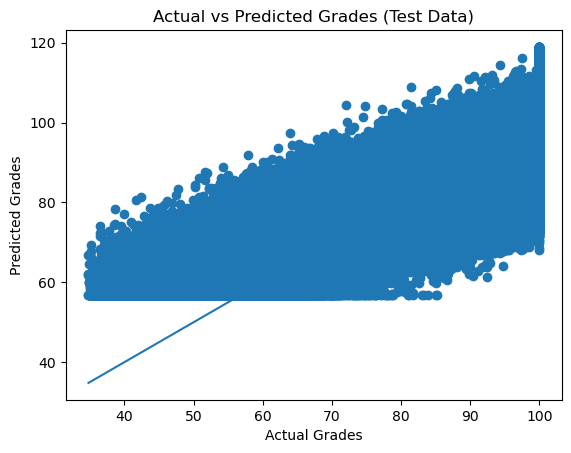

In [24]:
# Predict values for test set
y_test_pred = model.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_test_pred)

# Perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)

plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades (Test Data)")
plt.show()


In [25]:
# Evaluation Metrics (This is the “Score” of the Model)

# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse
# Meaning (VERY SIMPLE):
# MSE tells us how far the predictions are from the actual values on average.
# Lower MSE = better model.

# MSE tells us how wrong the model is, on average. Lower is better.

80.93522867436951

In [26]:
# R² Score (Most Important)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

# Meaning:
# R² ranges from 0 to 1
# Closer to 1 → better performance
# Example explanation:
# An R² score close to 1 indicates that the model explains most of the variation in student performance.

0.6600425865640975

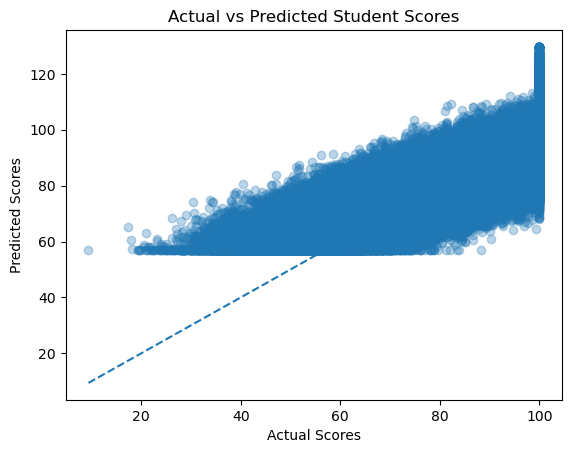

In [35]:
# Visualization: Actual vs Predicted Scores

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Student Scores")
plt.show()


# How to read this plot:
# Each dot = one student
# If dots are close to the diagonal → good predictions
# Report sentence:
# The scatter plot shows that predicted scores are close to actual scores, indicating good model performance.
# How close are the model’s predicted scores to the real (actual) scores?

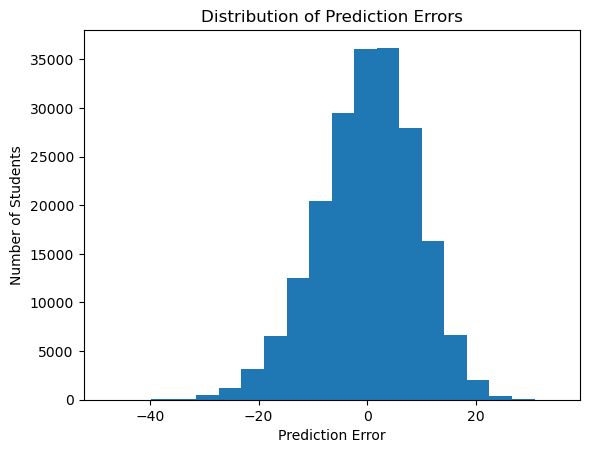

In [30]:
plt.hist(residuals, bins=20)
plt.xlabel("Prediction Error")
plt.ylabel("Number of Students")
plt.title("Distribution of Prediction Errors")
plt.show()

# The histogram shows how prediction errors are distributed. Most errors are close to zero, indicating good model performance.

SECTION 6: Conclusion and Future Work

In this project, a Multiple Linear Regression model was developed to predict students’ total scores based on weekly self-study hours, attendance percentage, and class participation. The dataset was explored, cleaned, and visualized to understand relationships between variables. The trained model demonstrated reasonable predictive performance, with predicted scores generally close to actual scores. Evaluation metrics such as Mean Squared Error (MSE) and R² score indicated that the model was able to explain a significant portion of the variation in student performance. Overall, the results show that study habits and attendance play an important role in academic success.

Future Work:

Future improvements could include using additional features such as previous exam scores, socioeconomic factors, or learning environment variables to improve prediction accuracy. More advanced machine learning models such as Decision Trees or Random Forests could also be explored and compared with linear regression. Additionally, classification models could be applied to predict student grades (A–F) instead of numerical scores.